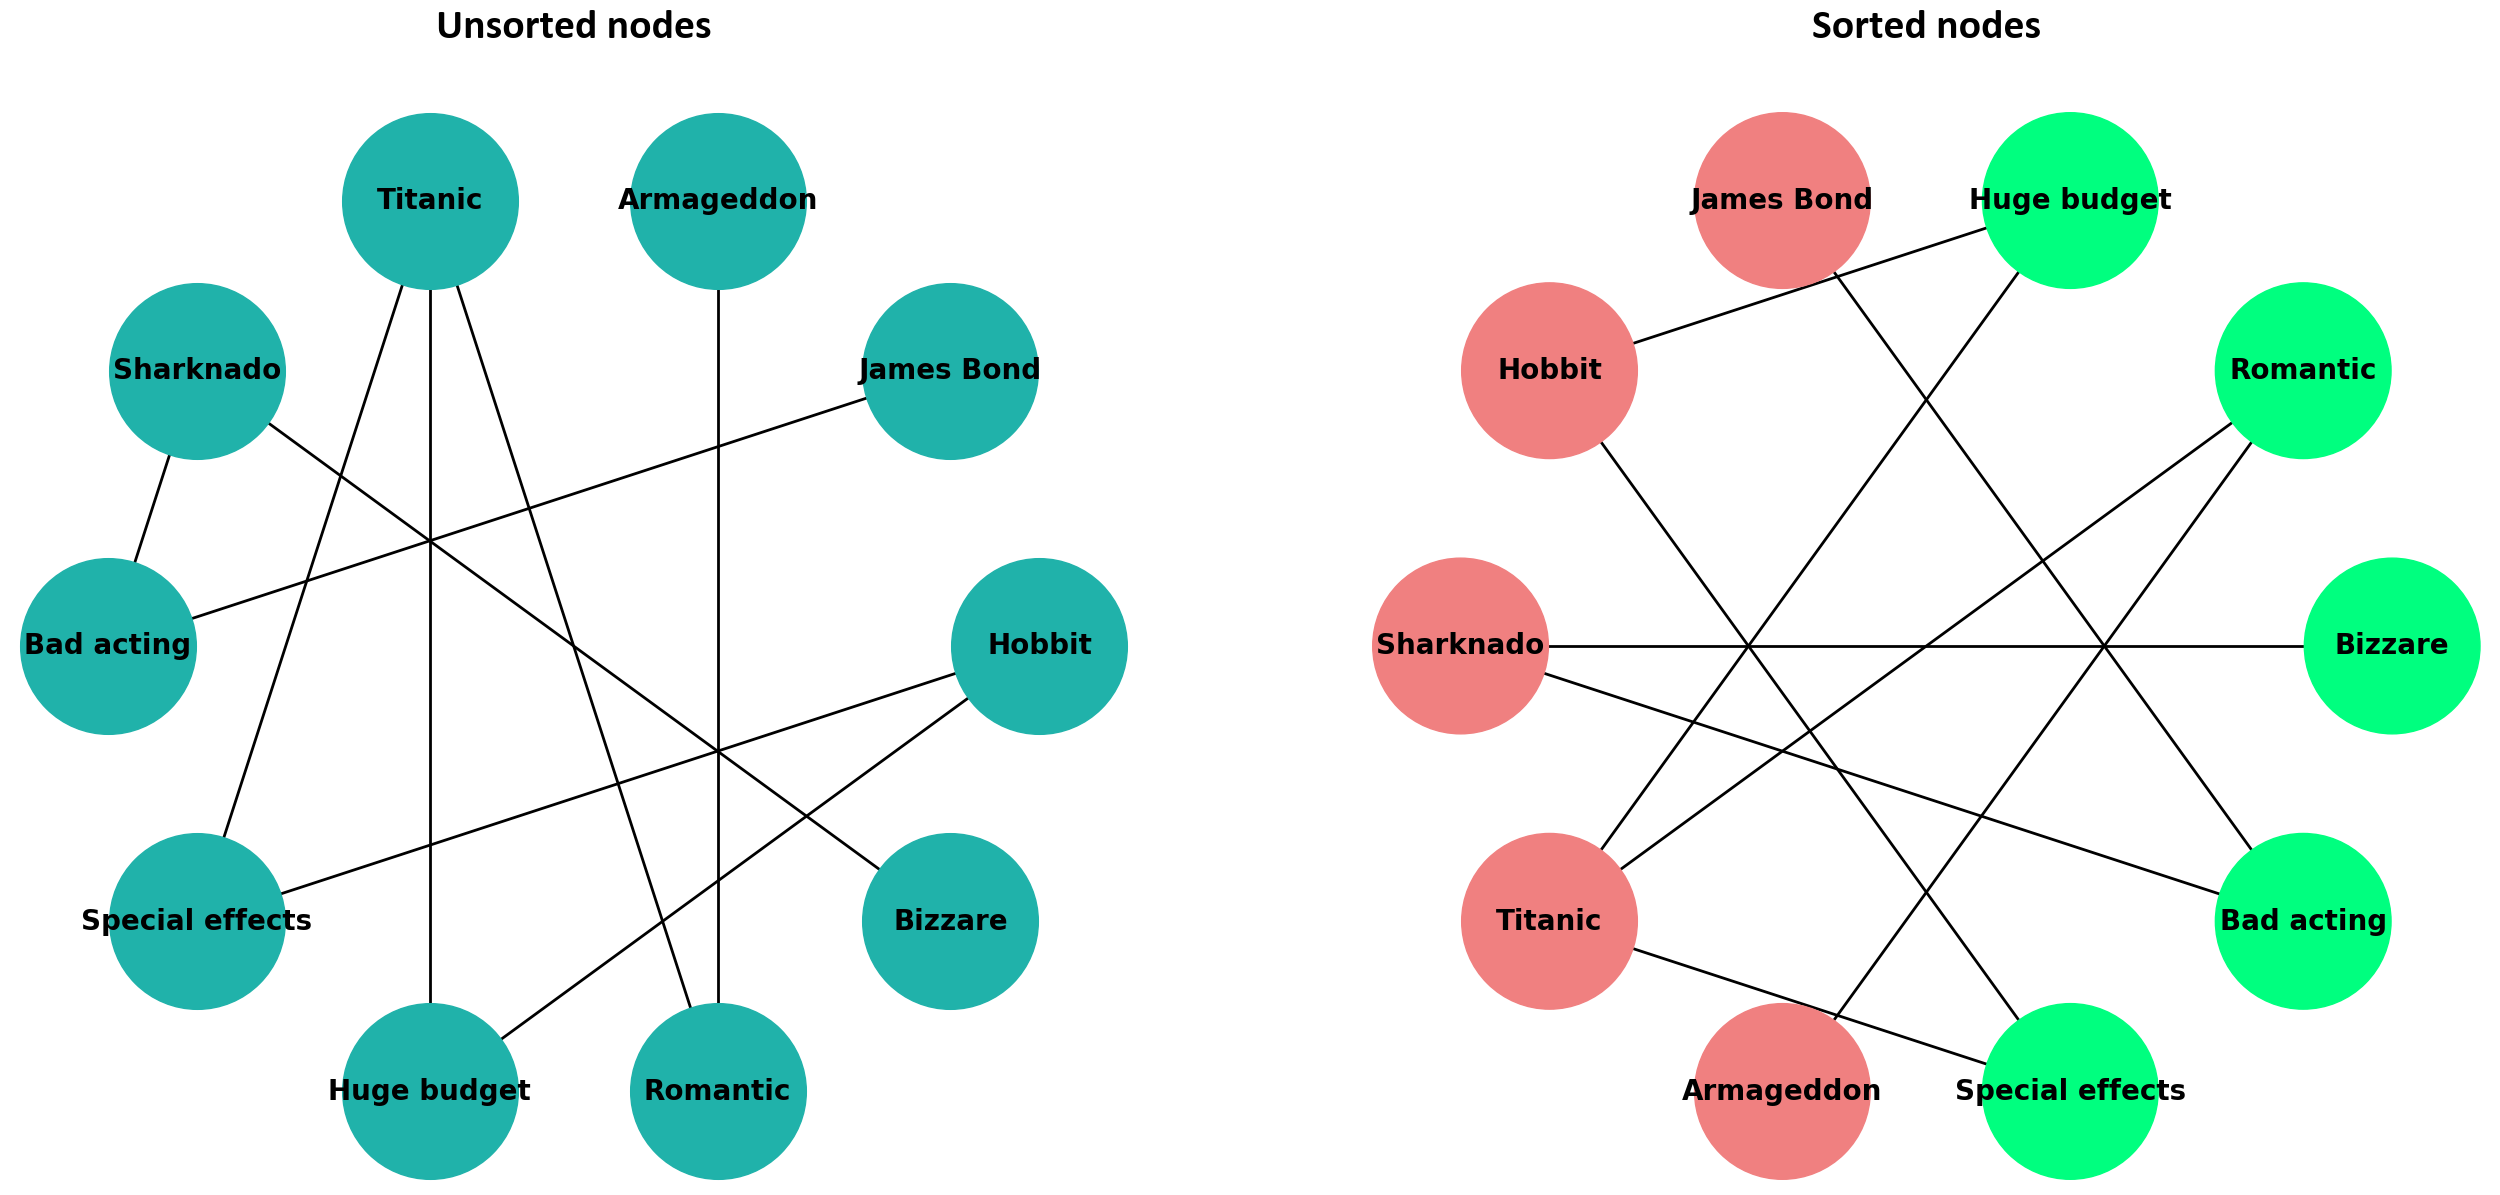

In [8]:
# Figure 3. Sorted vs. unsorted nodes in network plot

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(32,14))
ax1.set_title('Unsorted nodes',fontsize=30,fontweight='bold',fontname="Calibri",pad=50)
ax2.set_title('Sorted nodes',fontsize=30,fontweight='bold',fontname="Calibri",pad=50)

G = nx.Graph()
G.add_nodes_from(['Hobbit', 'James Bond', 'Armageddon', 'Titanic','Sharknado','Bad acting',
                  'Special effects','Huge budget','Romantic','Bizzare'])


G.add_edges_from([('Hobbit', 'Special effects'), ('Titanic', 'Special effects'),
                  ('Sharknado', 'Bizzare'), ('Titanic', 'Romantic'),
                  ('Titanic', 'Huge budget'),
                  ('Bad acting', 'James Bond'),
                  ('Armageddon', 'Romantic'),
                  ('Bad acting', 'Sharknado'),
                  ('Hobbit', 'Huge budget')
                  ])

H = nx.Graph()
H.add_nodes_from(['Bizzare', 'Romantic', 'Huge budget','James Bond', 'Hobbit','Sharknado',
                  'Titanic','Armageddon','Special effects','Bad acting'])


attributes = pd.DataFrame(
    [['Hobbit', 'lightcoral'],
     ['James Bond', 'lightcoral'],
     ['Armageddon', 'lightcoral'],
     ['Titanic', 'lightcoral'],
     ['Sharknado', 'lightcoral'],
     ['Bad acting', 'springgreen'],
     ['Special effects', 'springgreen'],
     ['Huge budget', 'springgreen'],
     ['Romantic', 'springgreen'],
     ['Bizzare', 'springgreen']],
    columns=['id', 'color']
)


node_attr = attributes.set_index('id').to_dict('index')
nx.set_node_attributes(H, node_attr)

colors = [u[1] for u in H.nodes(data="color")]

H.add_edges_from([('Hobbit', 'Special effects'), ('Titanic', 'Special effects'),
                  ('Sharknado', 'Bizzare'), ('Titanic', 'Romantic'),
                  ('Titanic', 'Huge budget'),
                  ('Bad acting', 'James Bond'),
                  ('Armageddon', 'Romantic'),
                  ('Bad acting', 'Sharknado'),
                  ('Hobbit', 'Huge budget')
                  ])


pos1 = nx.circular_layout(G)
pos = nx.circular_layout(H)


plt.subplot(1, 2, 1)
ax1=nx.draw_networkx(G, pos=pos1,node_color='lightseagreen',node_size=16000,font_size=20,font_weight='bold',width=2)

plt.box(False)
plt.subplot(1, 2, 2)
ax2=nx.draw_networkx(H, pos=pos,node_color=colors,node_size=16000,font_size=20,font_weight='bold',width=2)

plt.box(False) #remove box

plt.savefig('network_tip_five.png',dpi=500, bbox_inches='tight')
plt.show()

In [9]:
# Hive plot

In [10]:
import pandas as pd
data = pd.read_csv('data_text_network_viz.csv')
attributes = pd.read_csv('attributes.csv')

In [11]:
data

,co_occurence,node1,node2
0,9,star wars,thor
1,9,thor,star wars
2,5,labyrinth,thor
3,5,thor,labyrinth
4,4,indiana jones,star wars
5,4,star wars,indiana jones
6,2,indiana jones,thor
7,2,labyrinth,star wars
8,2,star wars,labyrinth
9,2,thor,indiana jones


In [12]:
attributes

,node,studio
0,captain america,Marvel Studios
1,thor,Marvel Studios
2,avengers,Marvel Studios
3,black panther,Marvel Studios
4,star wars,Lucasfilm Ltd.
5,indiana jones,Lucasfilm Ltd.
6,willow,Lucasfilm Ltd.
7,labyrinth,Lucasfilm Ltd.
8,madagascar,DreamWorks
9,shrek,DreamWorks


In [13]:
# Hive plot
import networkx as nx

G = nx.from_pandas_edgelist(data, source='node1', target='node2',edge_attr='co_occurence')
node_attr = attributes.set_index('node').to_dict('index')
nx.set_node_attributes(G, node_attr)

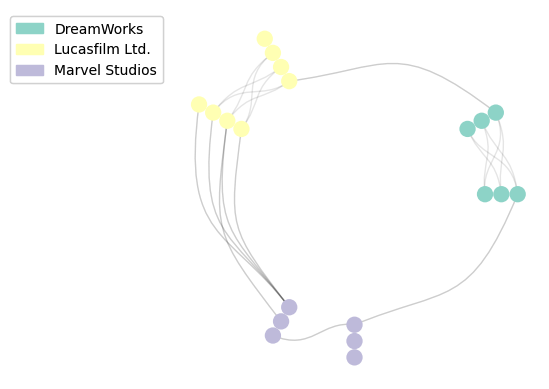

In [14]:
import nxviz as nv
from nxviz import annotate

nv.hive(G, group_by="studio", sort_by='studio',node_color_by="studio")
annotate.node_colormapping(G, color_by="studio")


plt.savefig('hive_plot.png',dpi=500, bbox_inches='tight')
plt.show()